Name: Soumil Saxena


# Baseline, PCA, LDA and SVM analysis


- Evaluation scenarios:
  - Use 20% of the images for training and 80% for testing
  - Use 50% of the images for training and 50% for testing
  - Use 80% of the images for training and 20% for testing
  - use the first K images per person for training, and the remaining ones for testing (see data split code below)
  - Plot CMC curve and confusion matrix for each combination of scenario and method
  - If hyperparameters need to be selected, pull out a reasonable held-out set from the training set.



## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [111]:
%matplotlib inline

from google.colab.patches import cv2_imshow
import numpy as np
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.datasets import fetch_olivetti_faces

# Get the dataset

In [66]:
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

(400, 64, 64)


# Split the dataset

50% of the images for training and 50% for testing

In [112]:
N_IDENTITIES = len(np.unique(faces.target))                        
GALLERY_SIZE = 2
HOLD_SIZE=1


gallery_indices = []
probe_indices = []
hold_indices=[]

for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  hold_indices+=indices[GALLERY_SIZE-HOLD_SIZE:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]


x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)


(80, 4096) (320, 4096)


20% of the images for training and 80% for testing

In [113]:
N_IDENTITIES = len(np.unique(faces.target))
GALLERY_SIZE1 = 5                           
HOLD_SIZE=1

gallery_indices1 = []
probe_indices1 = []
hold_indices1=[]

for i in range(N_IDENTITIES):
  indices1 = list(np.where(faces.target == i)[0])
  gallery_indices1 += indices1[:GALLERY_SIZE1]
  probe_indices1 += indices1[GALLERY_SIZE1:]

x1_train = faces.images[gallery_indices1].reshape(-1, img_height*img_width) # vectorize train images
y1_train = faces.target[gallery_indices1]
x1_test = faces.images[probe_indices1].reshape(-1, img_height*img_width)    # vectorize test images
y1_test = faces.target[probe_indices1]

print(x1_train.shape, x1_test.shape)

(200, 4096) (200, 4096)


80% of the images for training and 20% for testing

In [114]:
N_IDENTITIES = len(np.unique(faces.target))
GALLERY_SIZE2 = 8 

gallery_indices2 = []
probe_indices2 = []

for i in range(N_IDENTITIES):
  indices2 = list(np.where(faces.target == i)[0])
  gallery_indices2 += indices2[:GALLERY_SIZE2]
  probe_indices2 += indices2[GALLERY_SIZE2:]

x2_train = faces.images[gallery_indices2].reshape(-1, img_height*img_width) # vectorize train images
y2_train = faces.target[gallery_indices2]
x2_test = faces.images[probe_indices2].reshape(-1, img_height*img_width)    # vectorize test images
y2_test = faces.target[probe_indices2]


print(x2_train.shape, x2_test.shape)


(320, 4096) (80, 4096)


# Visualize the splits

In [70]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

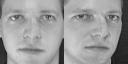

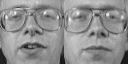

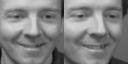

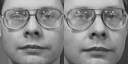

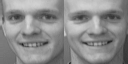

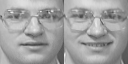

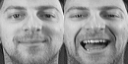

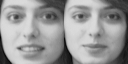

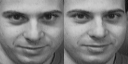

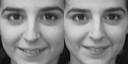

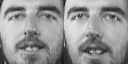

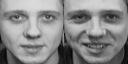

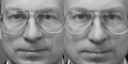

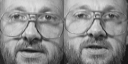

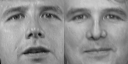

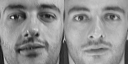

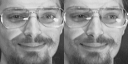

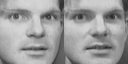

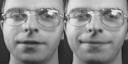

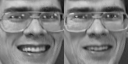

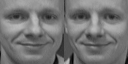

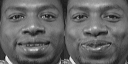

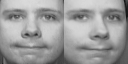

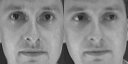

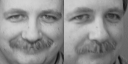

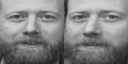

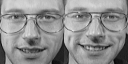

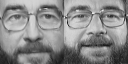

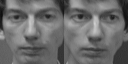

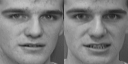

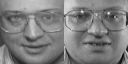

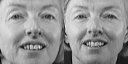

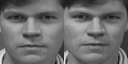

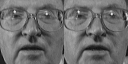

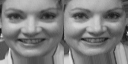

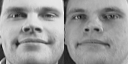

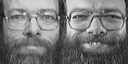

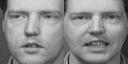

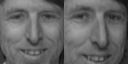

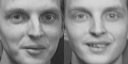

In [10]:
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)

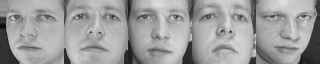

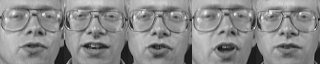

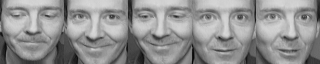

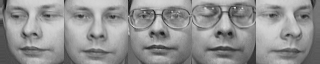

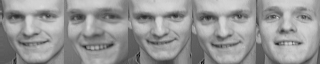

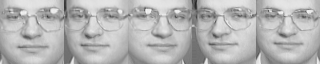

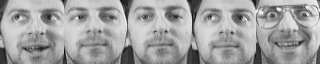

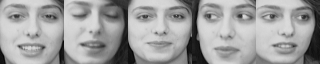

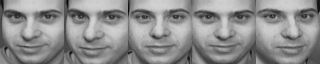

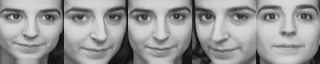

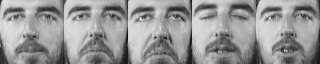

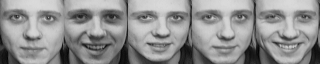

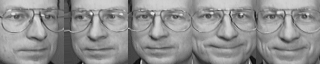

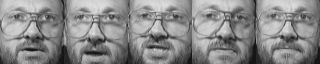

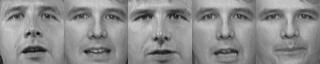

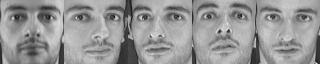

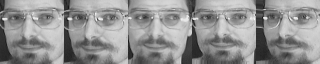

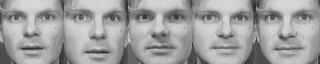

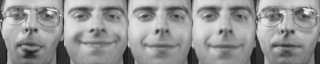

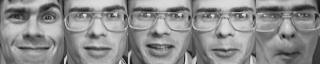

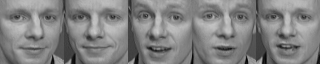

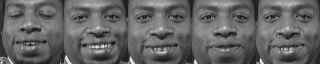

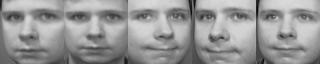

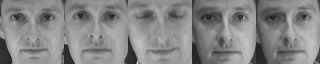

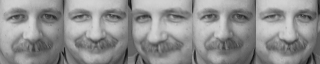

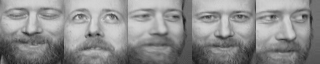

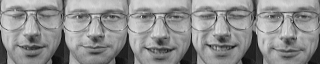

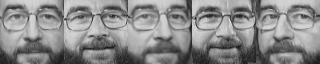

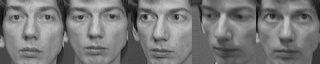

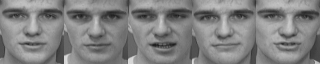

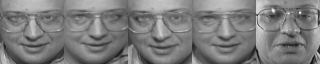

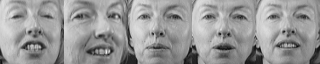

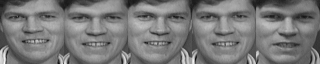

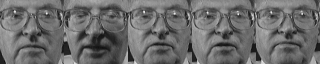

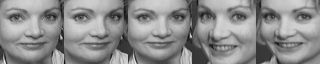

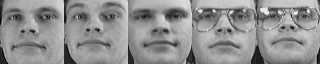

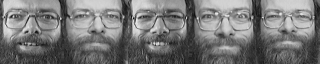

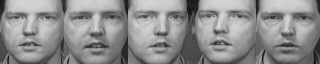

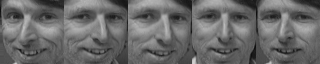

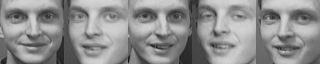

In [ ]:
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

# Run the experiments

Here is the code I used to get the results below!

# PCA

Check these amazing plots I have below!

[]

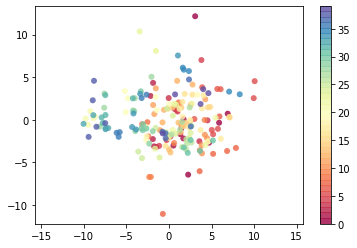

In [116]:
N_IDENTITIES = len(np.unique(faces.target))
size =2
size1 =5
size2 =5

hold_indices=[]
hold_indices1=[]
hold_indices2=[]

for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  indices1 = list(np.where(faces.target == i)[0])
  indices2 = list(np.where(faces.target == i)[0])
  hold_indices2+=indices2[GALLERY_SIZE2-HOLD_SIZE:GALLERY_SIZE2]
  hold_indices1+=indices1[GALLERY_SIZE1-HOLD_SIZE:GALLERY_SIZE1]
  hold_indices+=indices1[GALLERY_SIZE-HOLD_SIZE:GALLERY_SIZE]

x2_hold = faces.images[hold_indices2].reshape(-1, img_height*img_width) # vectorize holdout images
y2_hold = faces.target[hold_indices2]
x1_hold = faces.images[hold_indices1].reshape(-1, img_height*img_width) # vectorize holdout images
y1_hold = faces.target[hold_indices1]
x_hold = faces.images[hold_indices].reshape(-1, img_height*img_width) # vectorize holdout images
y_hold = faces.target[hold_indices]

pca = PCA(n_components=2)
projected = pca.fit_transform(x1_train.reshape(-1, img_height*img_width))
plt.scatter(projected[:, 0], projected[:, 1], c=y1_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.axis('equal')
plt.colorbar()
plt.plot()


In [ ]:
n_eigen = []
rank1 = []
for i in range(10,41,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_hold.reshape(-1, img_height*img_width))

  # compare each probe to all gallery samples and check if the closest one has the same label
  acc = 0
  for j in range(len(probe)):
    closest = 0
    closest_dist = np.sum((gallery[0]-probe[j])**2) # squared Euclidean distance
    for k in range(1, len(gallery)):
      dist = np.sum((gallery[k]-probe[j])**2)
      if dist < closest_dist:
        closest_dist = dist
        closest = k
    if y_hold[j]== y_train[closest]:
      acc+=1

  n_eigen.append(i)
  rank1.append(100.0*acc/len(probe))

plt.plot(n_eigen, rank1)
plt.xlabel("eigenvectors")
plt.ylabel("accuracy")
plt.ylim(0, 100)
plt.plot()

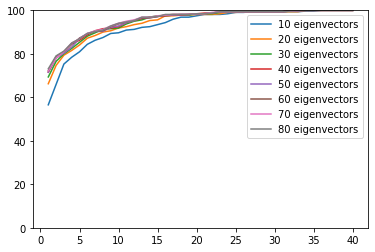

In [119]:
for i in range(10,88,10):
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

In [ ]:
n_eigen = []
rank1 = []
for i in range(10,81,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x1_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x1_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x1_hold.reshape(-1, img_height*img_width))

  # compare each probe to all gallery samples and check if the closest one has the same label
  acc = 0
  for j in range(len(probe)):
    closest = 0
    closest_dist = np.sum((gallery[0]-probe[j])**2) # squared Euclidean distance
    for k in range(1, len(gallery)):
      dist = np.sum((gallery[k]-probe[j])**2)
      if dist < closest_dist:
        closest_dist = dist
        closest = k
    if y1_hold[j] == y1_train[closest]:
      acc+=1

  n_eigen.append(i)
  rank1.append(100.0*acc/len(probe))

plt.plot(n_eigen, rank1)
plt.xlabel("eigenvectors")
plt.ylabel("accuracy")
plt.ylim(0, 100)
plt.plot()

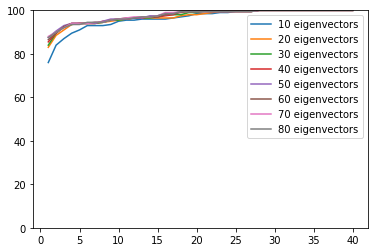

In [122]:
for i in range(10,81,10):
  pca = PCA(n_components=i)
  pca.fit(x1_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x1_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x1_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y1_test[j] == y1_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y1_test[j] != y1_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y1_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

[]

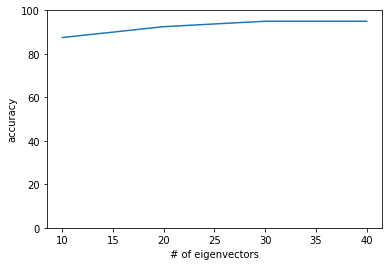

In [86]:
n_eigen = []
rank1 = []
for i in range(10,50,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x2_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x2_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x2_hold.reshape(-1, img_height*img_width))

  # compare each probe to all gallery samples and check if the closest one has the same label
  acc = 0
  for j in range(len(probe)):
    closest = 0
    closest_dist = np.sum((gallery[0]-probe[j])**2) # squared Euclidean distance
    for k in range(1, len(gallery)):
      dist = np.sum((gallery[k]-probe[j])**2)
      if dist < closest_dist:
        closest_dist = dist
        closest = k
    if y2_hold[j] == y2_train[closest]:
      acc+=1

  n_eigen.append(i)
  rank1.append(100.0*acc/len(probe))

plt.plot(n_eigen, rank1)
plt.xlabel("# of eigenvectors")
plt.ylabel("accuracy")
plt.ylim(0, 100)
plt.plot()

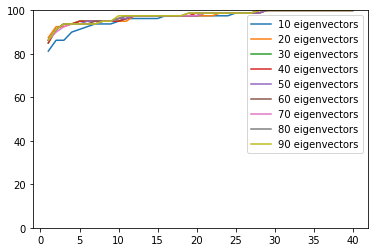

In [88]:
for i in range(10,100,10):
  pca = PCA(n_components=i)
  pca.fit(x2_train.reshape(-1, img_height*img_width))

  gallery = pca.transform(x2_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x2_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y2_test[j] == y2_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y2_test[j] != y2_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y2_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

# LDA

we dont need holdout sets for lda so we have to split again

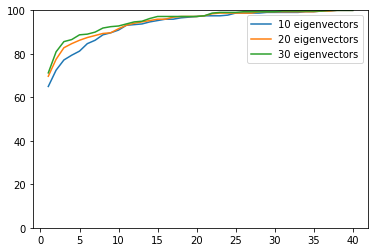

In [115]:
for i in range(10,35,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

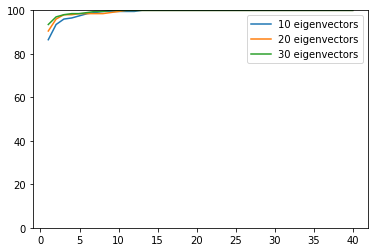

In [95]:
for i in range(10,31,10):
  lda = LDA(n_components=i)
  lda.fit(x1_train.reshape(-1, img_height*img_width), y1_train)

  gallery = lda.transform(x1_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x1_test.reshape(-1, img_height*img_width))

  CMC = {}

  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y1_test[j] == y1_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y1_test[j] != y1_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y1_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

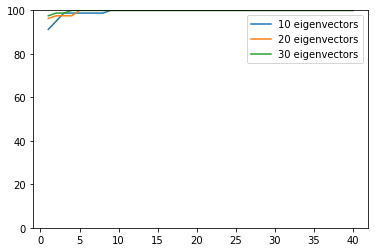

In [96]:
for i in range(10,31,10):
  lda = LDA(n_components=i)
  lda.fit(x2_train.reshape(-1, img_height*img_width), y2_train)

  gallery = lda.transform(x2_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x2_test.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y2_test[j] == y2_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y2_test[j] != y2_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y2_train[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

eval 1: 0.99%


Text(69.0, 0.5, 'predicted label')

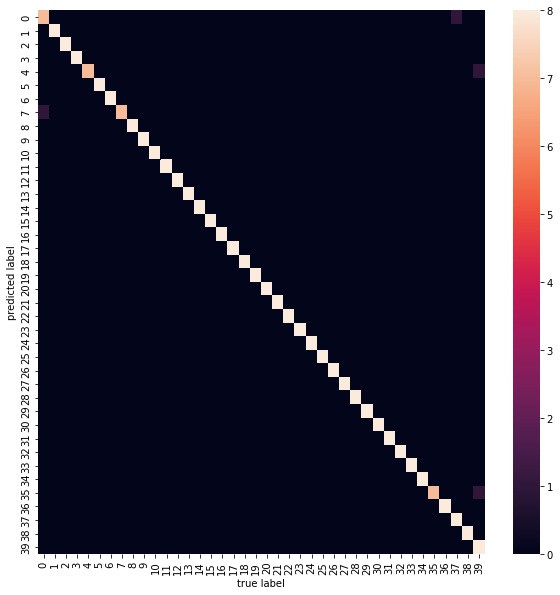

In [105]:
x_tester,x_eval=lda.transform(x_train),lda.transform(x_test)
model=SVC()
model.fit(x_tester, y_train)
y_ = model.predict(x_eval)
print("eval 1: {:.2f}%".format(accuracy_score(y_test, y_)))

plt.figure(1, figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_))
plt.xlabel('true label')
plt.ylabel('predicted label')

eval 2: 0.98%


Text(69.0, 0.5, 'predicted label')

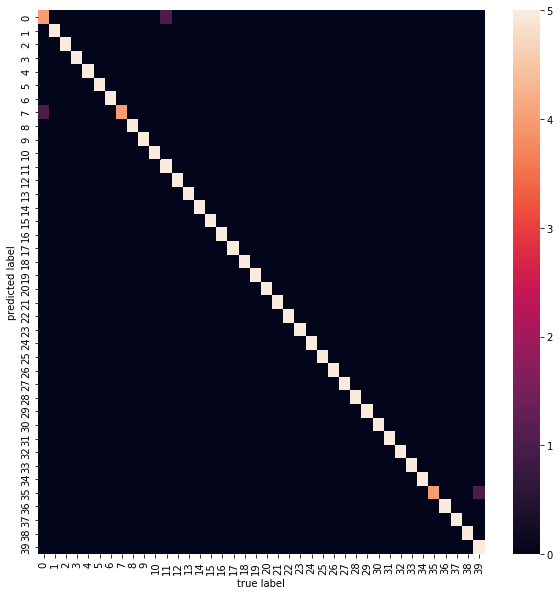

In [106]:
x1_tester,x1_eval=lda.transform(x1_train),lda.transform(x1_test)
model=SVC()
model.fit(x1_tester, y1_train)
y1_ = model.predict(x1_eval)
print("eval 2: {:.2f}%".format(accuracy_score(y1_test, y1_)))

plt.figure(1, figsize=(10, 10))
sns.heatmap(confusion_matrix(y1_test, y1_))
plt.xlabel('true label')
plt.ylabel('predicted label')

eval 3: 0.89%


Text(69.0, 0.5, 'predicted label')

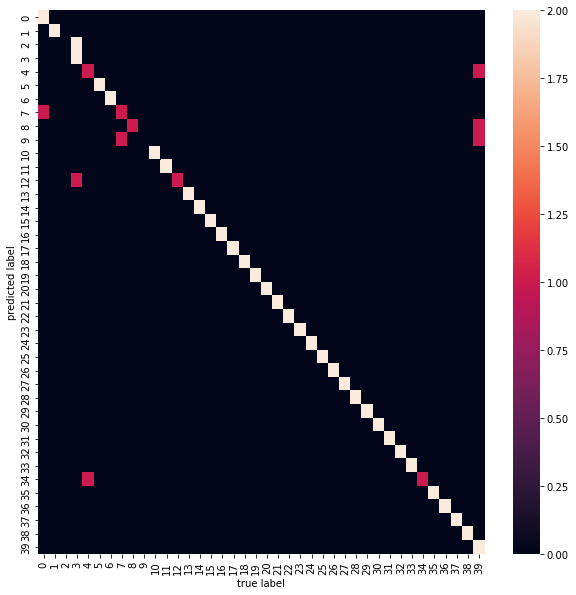

In [128]:
x2_tester,x2_eval=lda.transform(x2_train),lda.transform(x2_test)
model=SVC()
model.fit(x2_tester, y2_train)
y2_ = model.predict(x2_eval)
print("eval 3: {:.2f}%".format(accuracy_score(y2_test, y2_)))

plt.figure(1, figsize=(10, 10))
sns.heatmap(confusion_matrix(y2_test, y2_))
plt.xlabel('true label')
plt.ylabel('predicted label')

# SVM

In [130]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)
model.fit(x1_train, y1_train)
model.fit(x2_train, y2_train)


yfit1 = model.predict(x_test)
yfit2 = model.predict(x1_test)
yfit3 = model.predict(x2_test)

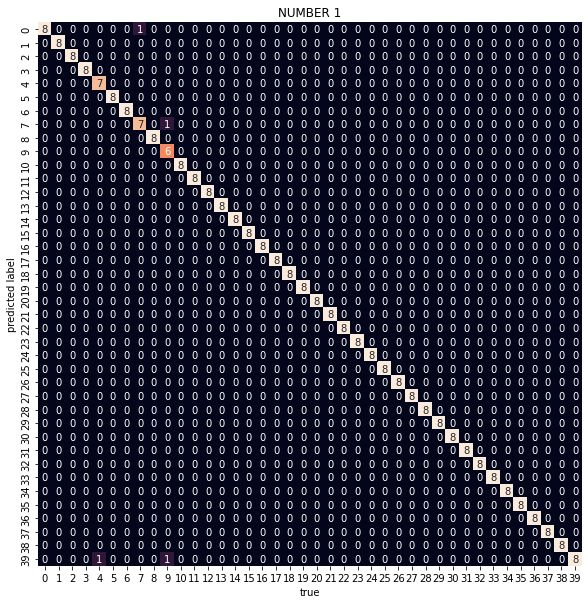

In [131]:
mat1 = confusion_matrix(y_test, yfit1)
plt.figure(figsize=(10,10))
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.title("NUMBER 1")
plt.xlabel('true')
plt.ylabel('predicted label');



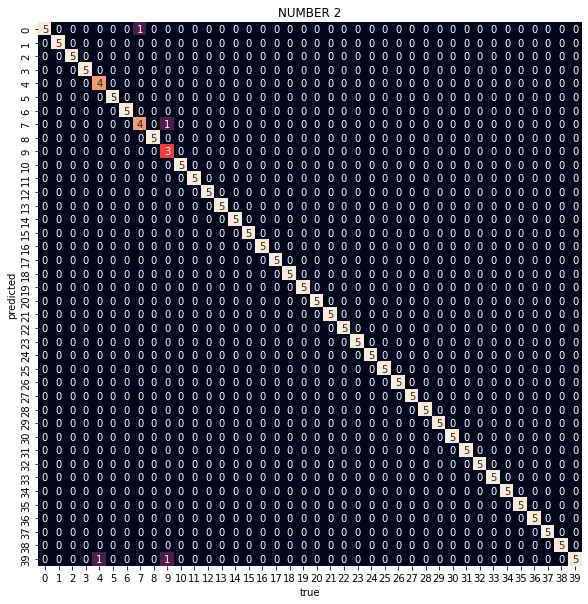

In [132]:
mat2 = confusion_matrix(y1_test, yfit2)
plt.figure(figsize=(10,10))
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False)
plt.title("NUMBER 2")
plt.xlabel('true')
plt.ylabel('predicted');



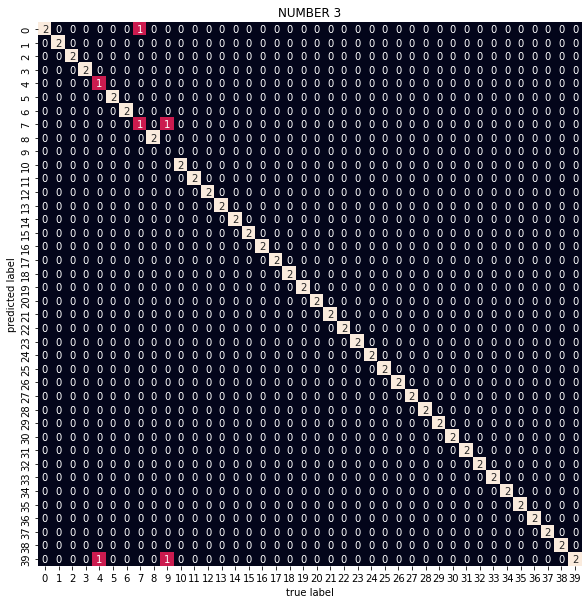

In [133]:
mat3 = confusion_matrix(y2_test, yfit3)
plt.figure(figsize=(10,10))
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False)
plt.title("NUMBER 3")
plt.xlabel('true label')
plt.ylabel('predicted label');

To compute the CMC curve, we have to compute the probability/similarity/distance between the sample and all classes. To to that, we have to run SVC with probability=True and then call predict_proba:

In [139]:
yfit1 = model.predict_proba(x_test)
yfit2 = model.predict_proba(x1_test)
yfit3 = model.predict_proba(x2_test)

cmc curve plotting function

In [140]:
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if (sim >= genuine_sim).all():
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()


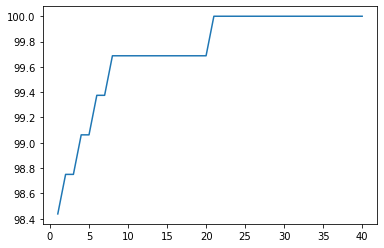

In [142]:
plot_CMC(yfit1,y_test)


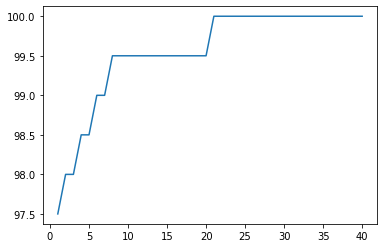

In [143]:
plot_CMC(yfit2,y1_test)

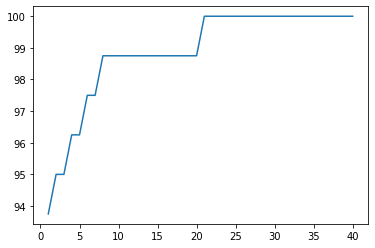

In [144]:
plot_CMC(yfit3,y2_test)

# Implement your baseline
The algorithm takes in input and classifies them into a very basic model

In [123]:
def baseline_func(x_train,x_test,y_train,y_test):
  from sklearn.naive_bayes import GaussianNB
  model=GaussianNB()
  model.fit(x_train,y_train)
  
  for i in range(len(x_test)):
    calc=model.predict(x_test[i].reshape(-1,img_height*img_width))
  return calc/len(y_test)

In [124]:
print(baseline_func(x_train,x_test,y_train,y_test))

[0.115625]


In [125]:
print(baseline_func(x1_train,x1_test,y1_train,y1_test))


[0.195]


In [127]:
print(baseline_func(x2_train,x2_test,y2_train,y2_test))

[0.4875]


# Report your results



I used the code from the lecture 14. I use holding sets for PCA but didnt need them for LDA. After running baseline functions, we got 0.115 for the first condition, 0.195 for the second, 0.4875 for the third. 

-SVM was getting an average accuracy of more than 0.9 so it did pretty well.

-PCA did worse than the other two, I was not able to implement the confusion matrix for PCA. 

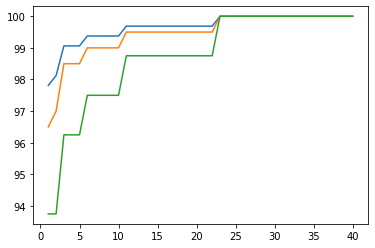

-The LDA one better but svm was better.

First conditions delivered better accuracy, the third one was more training data than testing data, but fared pretty worse than the others.

References:

LDA, PCA: https://colab.research.google.com/drive/17D5FH6RqUor_Qp1r8XUGMWAYZKNrHmRo?usp=sharing

SVM :https://colab.research.google.com/drive/1b9gTIv6LK1kU6-OqYN98KhfuhfPxPvny?usp=sharing

For baseline:
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

https://www.researchgate.net/publication/273917134_Comparative_Study_of_PCA_ICA_LDA_using_SVM_Classifier/link/55400ac20cf2320416ecec32/download